### Data Preprocessing (Exploration E.2)

In [1]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [2]:
preprocessed_data = pd.read_csv('Absenteeism_Preprocessed.csv')
preprocessed_data.head()

,Reason Class 1,Reason Class 2,Reason Class 3,Reason Class 4,Day,Month,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,1,7,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,1,7,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,2,7,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,3,7,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,3,7,289,36,33,239.554,30,0,2,1,2


In [3]:
preprocessed_data['Pets'] = preprocessed_data['Pets'].map({0:0, 1:1, 2:2, 3:2, 4:2, 5:2, 6:2, 7:2, 8:2})
preprocessed_data.describe(include='all')

,Reason Class 1,Reason Class 2,Reason Class 3,Reason Class 4,Day,Month,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.252857,0.038571,0.135714,0.597143,2.410000,6.897143,222.347143,29.892857,36.417143,271.801774,26.737143,0.167143,1.021429,0.557143,6.761429
std,0.434961,0.192709,0.342730,0.490823,1.761669,3.342319,66.312960,14.804446,6.379083,40.021804,4.254701,0.373370,1.112215,0.784975,12.670082
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,118.000000,5.000000,27.000000,205.917000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,179.000000,16.000000,31.000000,241.476000,24.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,7.000000,225.000000,26.000000,37.000000,264.249000,25.000000,0.000000,1.000000,0.000000,3.000000
75%,1.000000,0.000000,0.000000,1.000000,4.000000,10.000000,260.000000,50.000000,40.000000,294.217000,31.000000,0.000000,2.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,6.000000,12.000000,388.000000,52.000000,58.000000,378.884000,38.000000,1.000000,4.000000,2.000000,120.000000


In [4]:
data_store = preprocessed_data.copy()

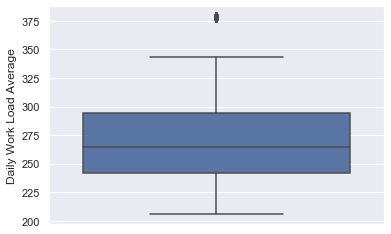

In [5]:
sns.boxplot(preprocessed_data['Daily Work Load Average'], orient='v')

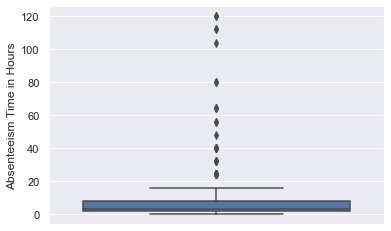

In [6]:
sns.boxplot(preprocessed_data['Absenteeism Time in Hours'], orient='v')

In [7]:
preprocessed_data['Absenteeism Time in Hours'].median()

3.0

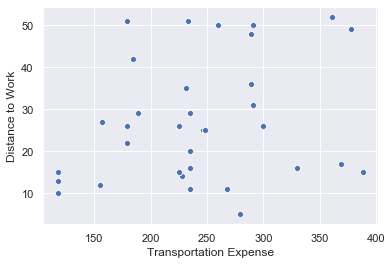

In [8]:
# Bivariate Analysis
sns.scatterplot(preprocessed_data['Transportation Expense'],preprocessed_data['Distance to Work'] )

In [9]:
target = np.where(preprocessed_data['Absenteeism Time in Hours'] > 
                  preprocessed_data['Absenteeism Time in Hours'].median(), 1, 0)
preprocessed_data['Excessive Absenteeism'] = target
preprocessed_data = preprocessed_data.drop(['Absenteeism Time in Hours'], axis=1)

In [10]:
reordered_columns = ['Reason Class 1', 'Reason Class 2', 'Reason Class 3', 'Reason Class 4', 
                     'Day', 'Month', 'Education', 'Children', 'Pets',
                     'Transportation Expense', 'Distance to Work', 'Age',
                     'Daily Work Load Average', 'Body Mass Index',  
                     'Excessive Absenteeism']
preprocessed_data = preprocessed_data[reordered_columns]
data_store = preprocessed_data.copy()

In [11]:
# Variable Transformation (Standardization of Inputs)
from sklearn.preprocessing import StandardScaler 

In [12]:
# Variable Transformation
cat_inputs = preprocessed_data.iloc[:, :9]
unscaled_inputs = preprocessed_data.iloc[:, 9:-1]

In [13]:
std_scaler = StandardScaler()
std_scaler.fit(unscaled_inputs)
std_inputs = pd.DataFrame(std_scaler.transform(unscaled_inputs))

In [14]:
preprocessed_data.columns

Index(['Reason Class 1', 'Reason Class 2', 'Reason Class 3', 'Reason Class 4',
       'Day', 'Month', 'Education', 'Children', 'Pets',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Excessive Absenteeism'],
      dtype='object')

In [15]:
scaled_inputs = pd.concat([cat_inputs, std_inputs], axis=1)
scaled_inputs.columns = ['Reason Class 1', 'Reason Class 2', 'Reason Class 3', 'Reason Class 4',
                         'Day', 'Month', 'Education', 'Children', 'Pets',
                         'Transportation Expense', 'Distance to Work', 'Age',
                         'Daily Work Load Average', 'Body Mass Index']
scaled_inputs

,Reason Class 1,Reason Class 2,Reason Class 3,Reason Class 4,Day,Month,Education,Children,Pets,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index
0,0,0,0,1,1,7,0,2,1,1.005844,0.412816,-0.536062,-0.806331,0.767431
1,0,0,0,0,1,7,0,1,0,-1.574681,-1.141882,2.130803,-0.806331,1.002633
2,0,0,0,1,2,7,0,0,0,-0.654143,1.426749,0.248310,-0.806331,1.002633
3,1,0,0,0,3,7,0,2,0,0.854936,-1.682647,0.405184,-0.806331,-0.643782
4,0,0,0,1,3,7,0,2,1,1.005844,0.412816,-0.536062,-0.806331,0.767431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2,5,1,2,0,-0.654143,-0.533522,0.562059,-0.853789,-1.114186
696,1,0,0,0,2,5,0,1,2,0.040034,-0.263140,-1.320435,-0.853789,-0.643782
697,1,0,0,0,3,5,1,0,0,1.624567,-0.939096,-1.320435,-0.853789,-0.408580
698,0,0,0,1,3,5,1,0,0,0.190942,-0.939096,-0.692937,-0.853789,-0.408580


In [16]:
data_store = scaled_inputs.copy()

In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, target, train_size=0.8, random_state=20)

In [36]:
y_train.shape

(560,)

### Primitive Model Training

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
accuracy = reg.score(x_train, y_train)
accuracy

0.8089285714285714

In [21]:
summ_features = scaled_inputs.columns.values
summ_coeff = np.transpose(reg.coef_)

In [22]:
summary_table = pd.DataFrame()
summary_table['Features'] = summ_features
summary_table['Coefficient'] = summ_coeff
summary_table['Log Odds'] = np.exp(summ_coeff)
summary_table.sort_values('Coefficient', ascending=False)

,Features,Coefficient,Log Odds
2,Reason Class 3,3.296038,27.005422
0,Reason Class 1,3.028972,20.675962
3,Reason Class 4,0.884088,2.420775
9,Transportation Expense,0.643141,1.902448
1,Reason Class 2,0.553112,1.738655
7,Children,0.304665,1.356171
13,Body Mass Index,0.304170,1.355499
5,Month,0.014117,1.014217
12,Daily Work Load Average,-0.030822,0.969648
4,Day,-0.034026,0.966547


In [23]:
summ_intercept = reg.intercept_[0]
summ_intercept

-1.7238634936167998

In [32]:
type(target)

numpy.ndarray

In [34]:
scaled_inputs = scaled_inputs.drop(['Month', 'Daily Work Load Average', 'Day', 'Distance to Work'], axis=1)
explored_data = pd.concat([scaled_inputs, preprocessed_data['Excessive Absenteeism']], axis=1)
explored_data.head()

,Reason Class 1,Reason Class 2,Reason Class 3,Reason Class 4,Education,Children,Pets,Transportation Expense,Age,Body Mass Index,Excessive Absenteeism
0,0,0,0,1,0,2,1,1.005844,-0.536062,0.767431,1
1,0,0,0,0,0,1,0,-1.574681,2.130803,1.002633,0
2,0,0,0,1,0,0,0,-0.654143,0.248310,1.002633,0
3,1,0,0,0,0,2,0,0.854936,0.405184,-0.643782,1
4,0,0,0,1,0,2,1,1.005844,-0.536062,0.767431,0


In [35]:
explored_data.to_csv('Absenteeism_Explored.csv', index=False)